## Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore') 

## Loading The Data

In [2]:
data = pd.read_csv(r"C:\Users\UDAY KIRAN\Downloads\boston.csv")

## Understanding The Data

In [3]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.size

7084

In [6]:
#checking the null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [74]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [75]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Exploratory Data Analysis 

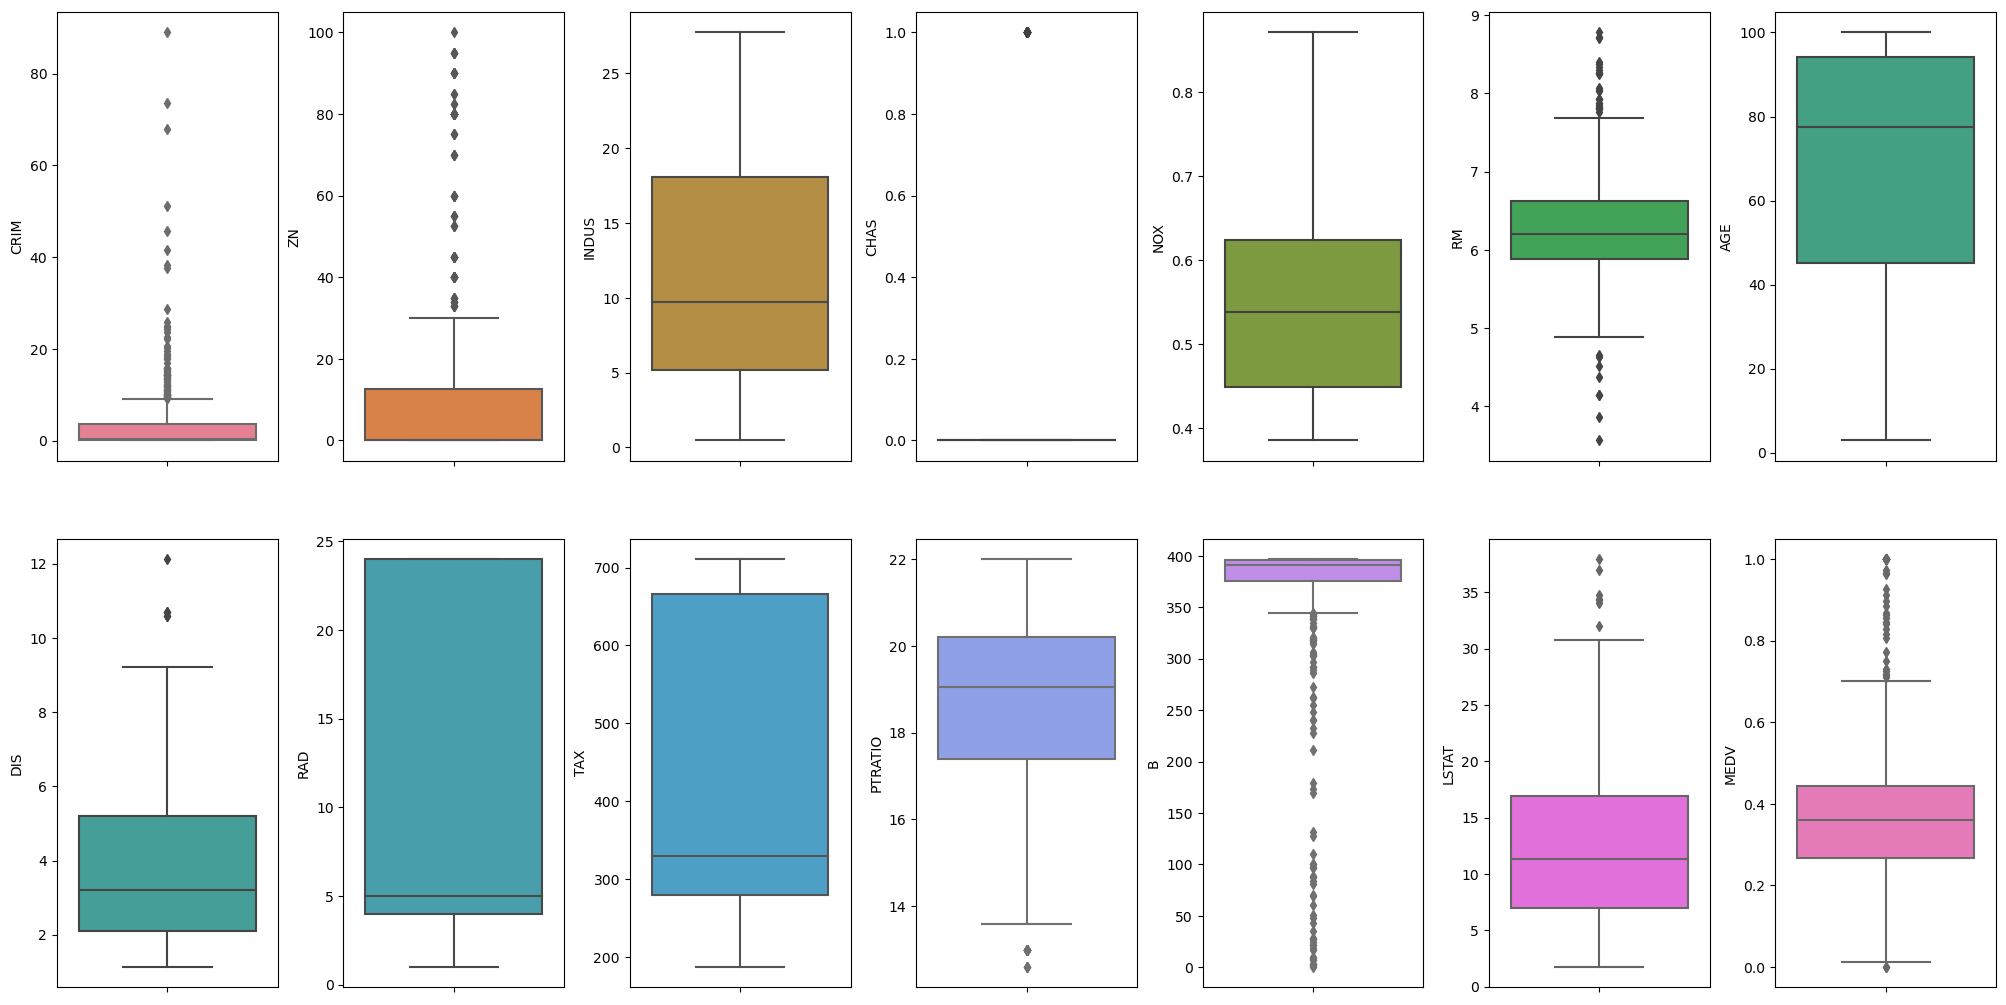

In [63]:
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ax=ax.flatten()
palette = sns.color_palette("husl",len(data.columns))
index = 0
for col,value in data.items():
    sns.boxplot(y=col,data=data,ax=ax[index],color=palette[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

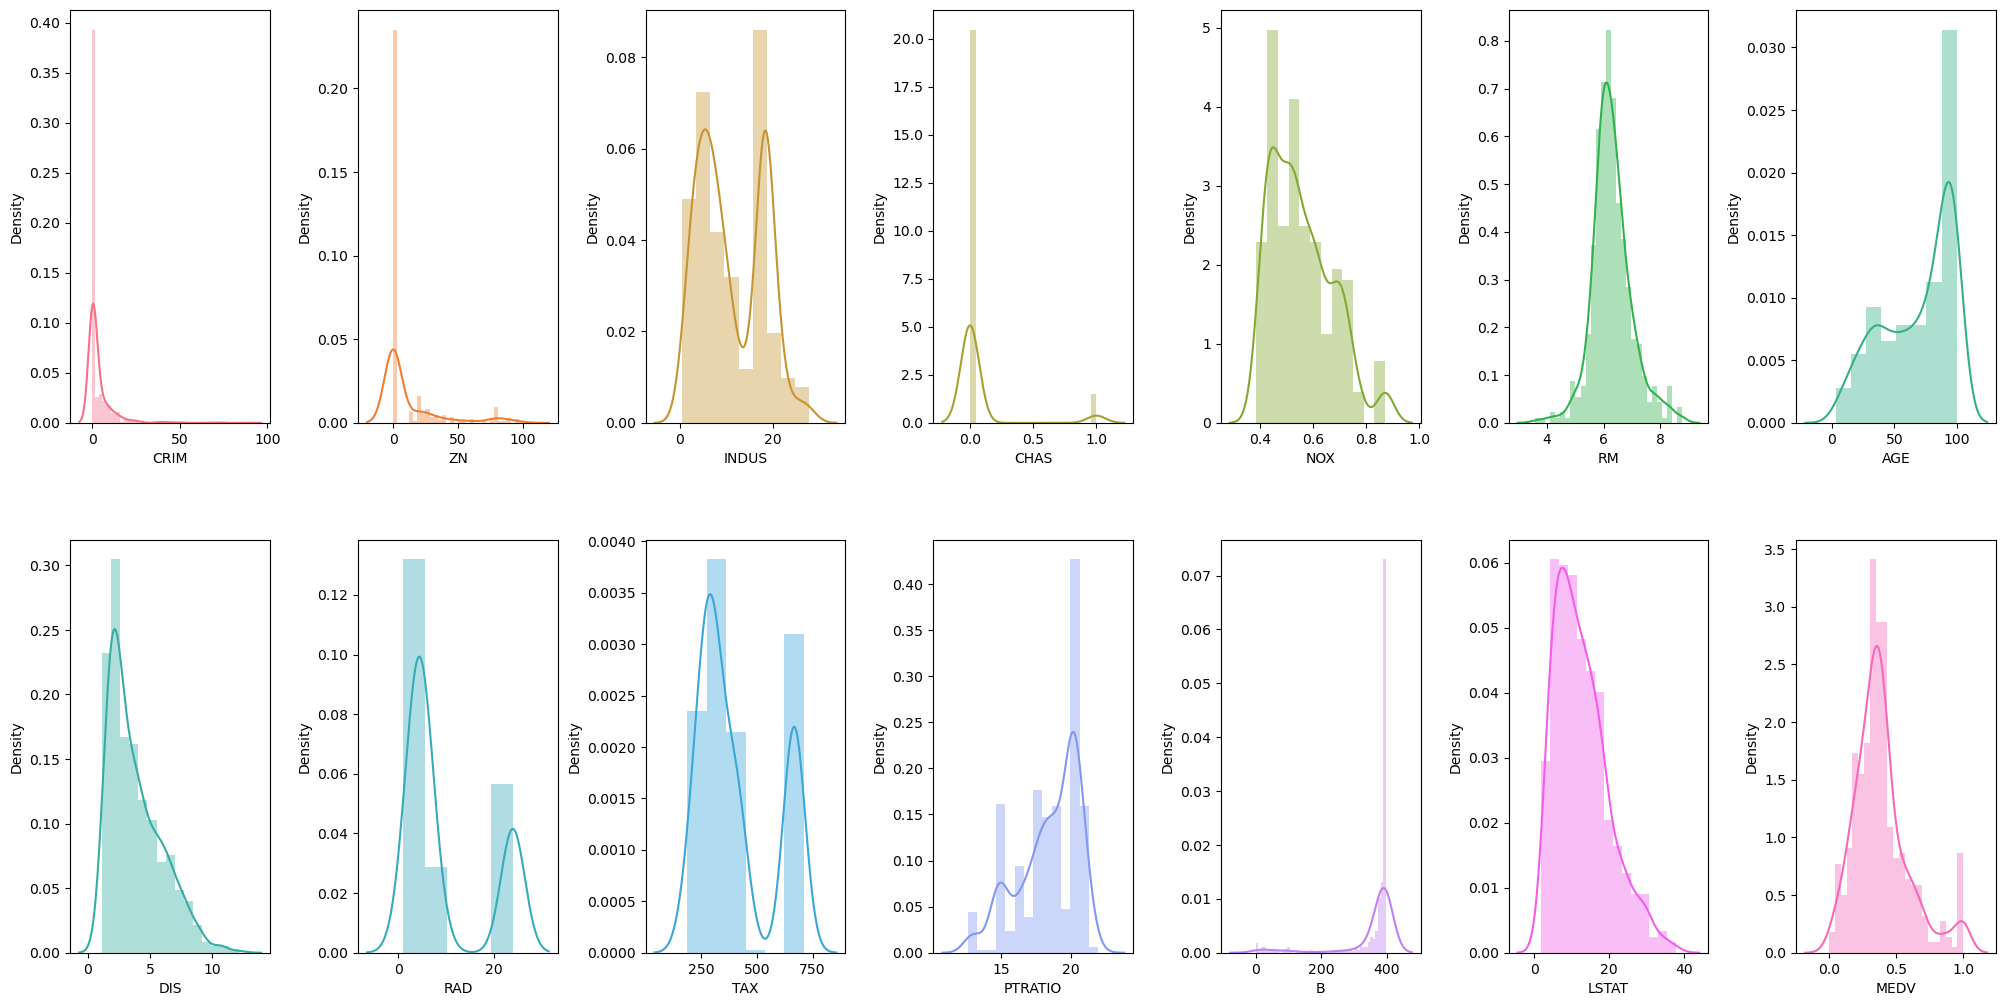

In [64]:
fig,ax= plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax=ax.flatten()
palette = sns.color_palette("husl",len(data.columns))
for col,value in data.items():
    sns.distplot(value,ax=ax[index],color=palette[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

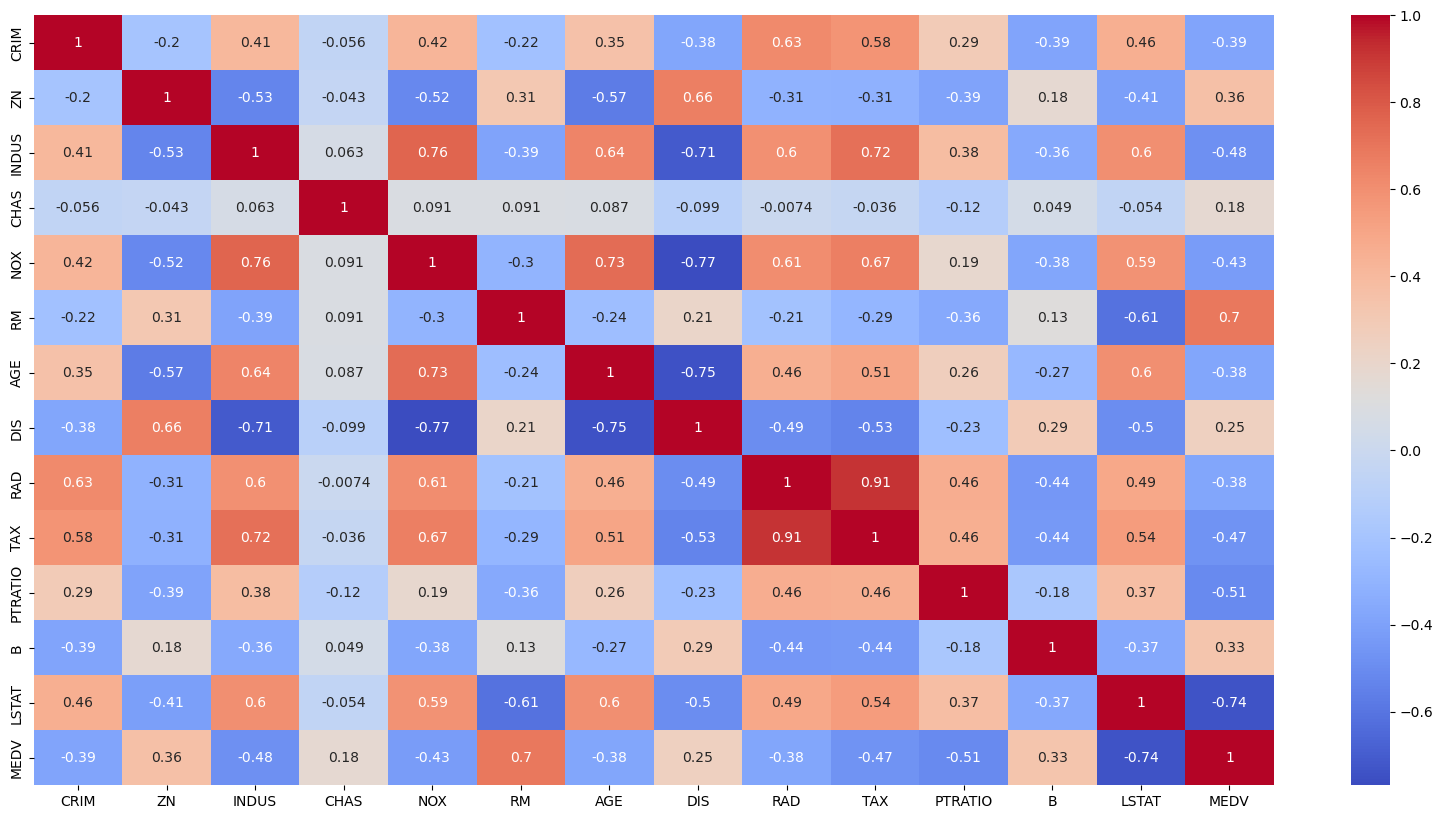

In [25]:
#coorelation matrix
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True,cmap='coolwarm')
plt.show()

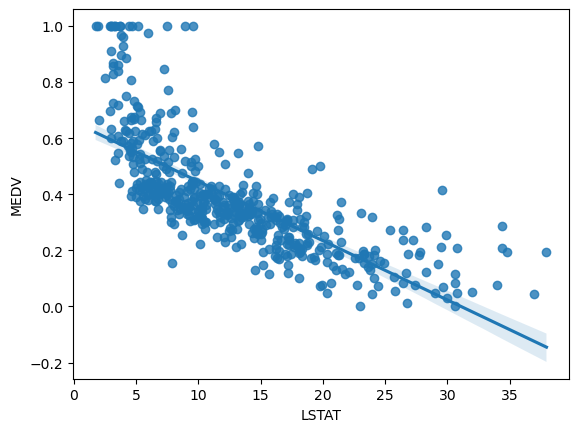

In [31]:
sns.regplot(y=data['MEDV'],x=data['LSTAT'])
plt.show()
#The prise decrease when the lstat increase 

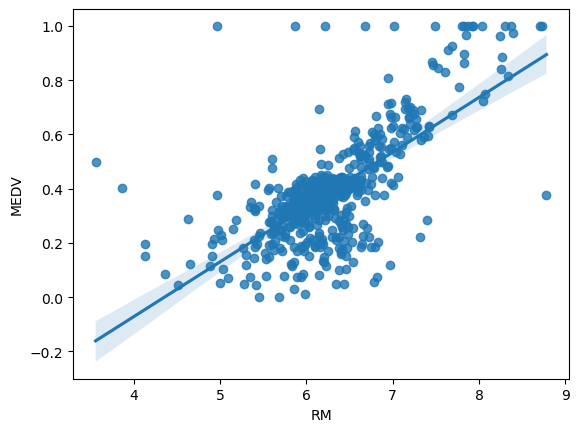

In [32]:
sns.regplot(y=data['MEDV'],x=data['RM'])
plt.show()
#THe price increase when RM increase 

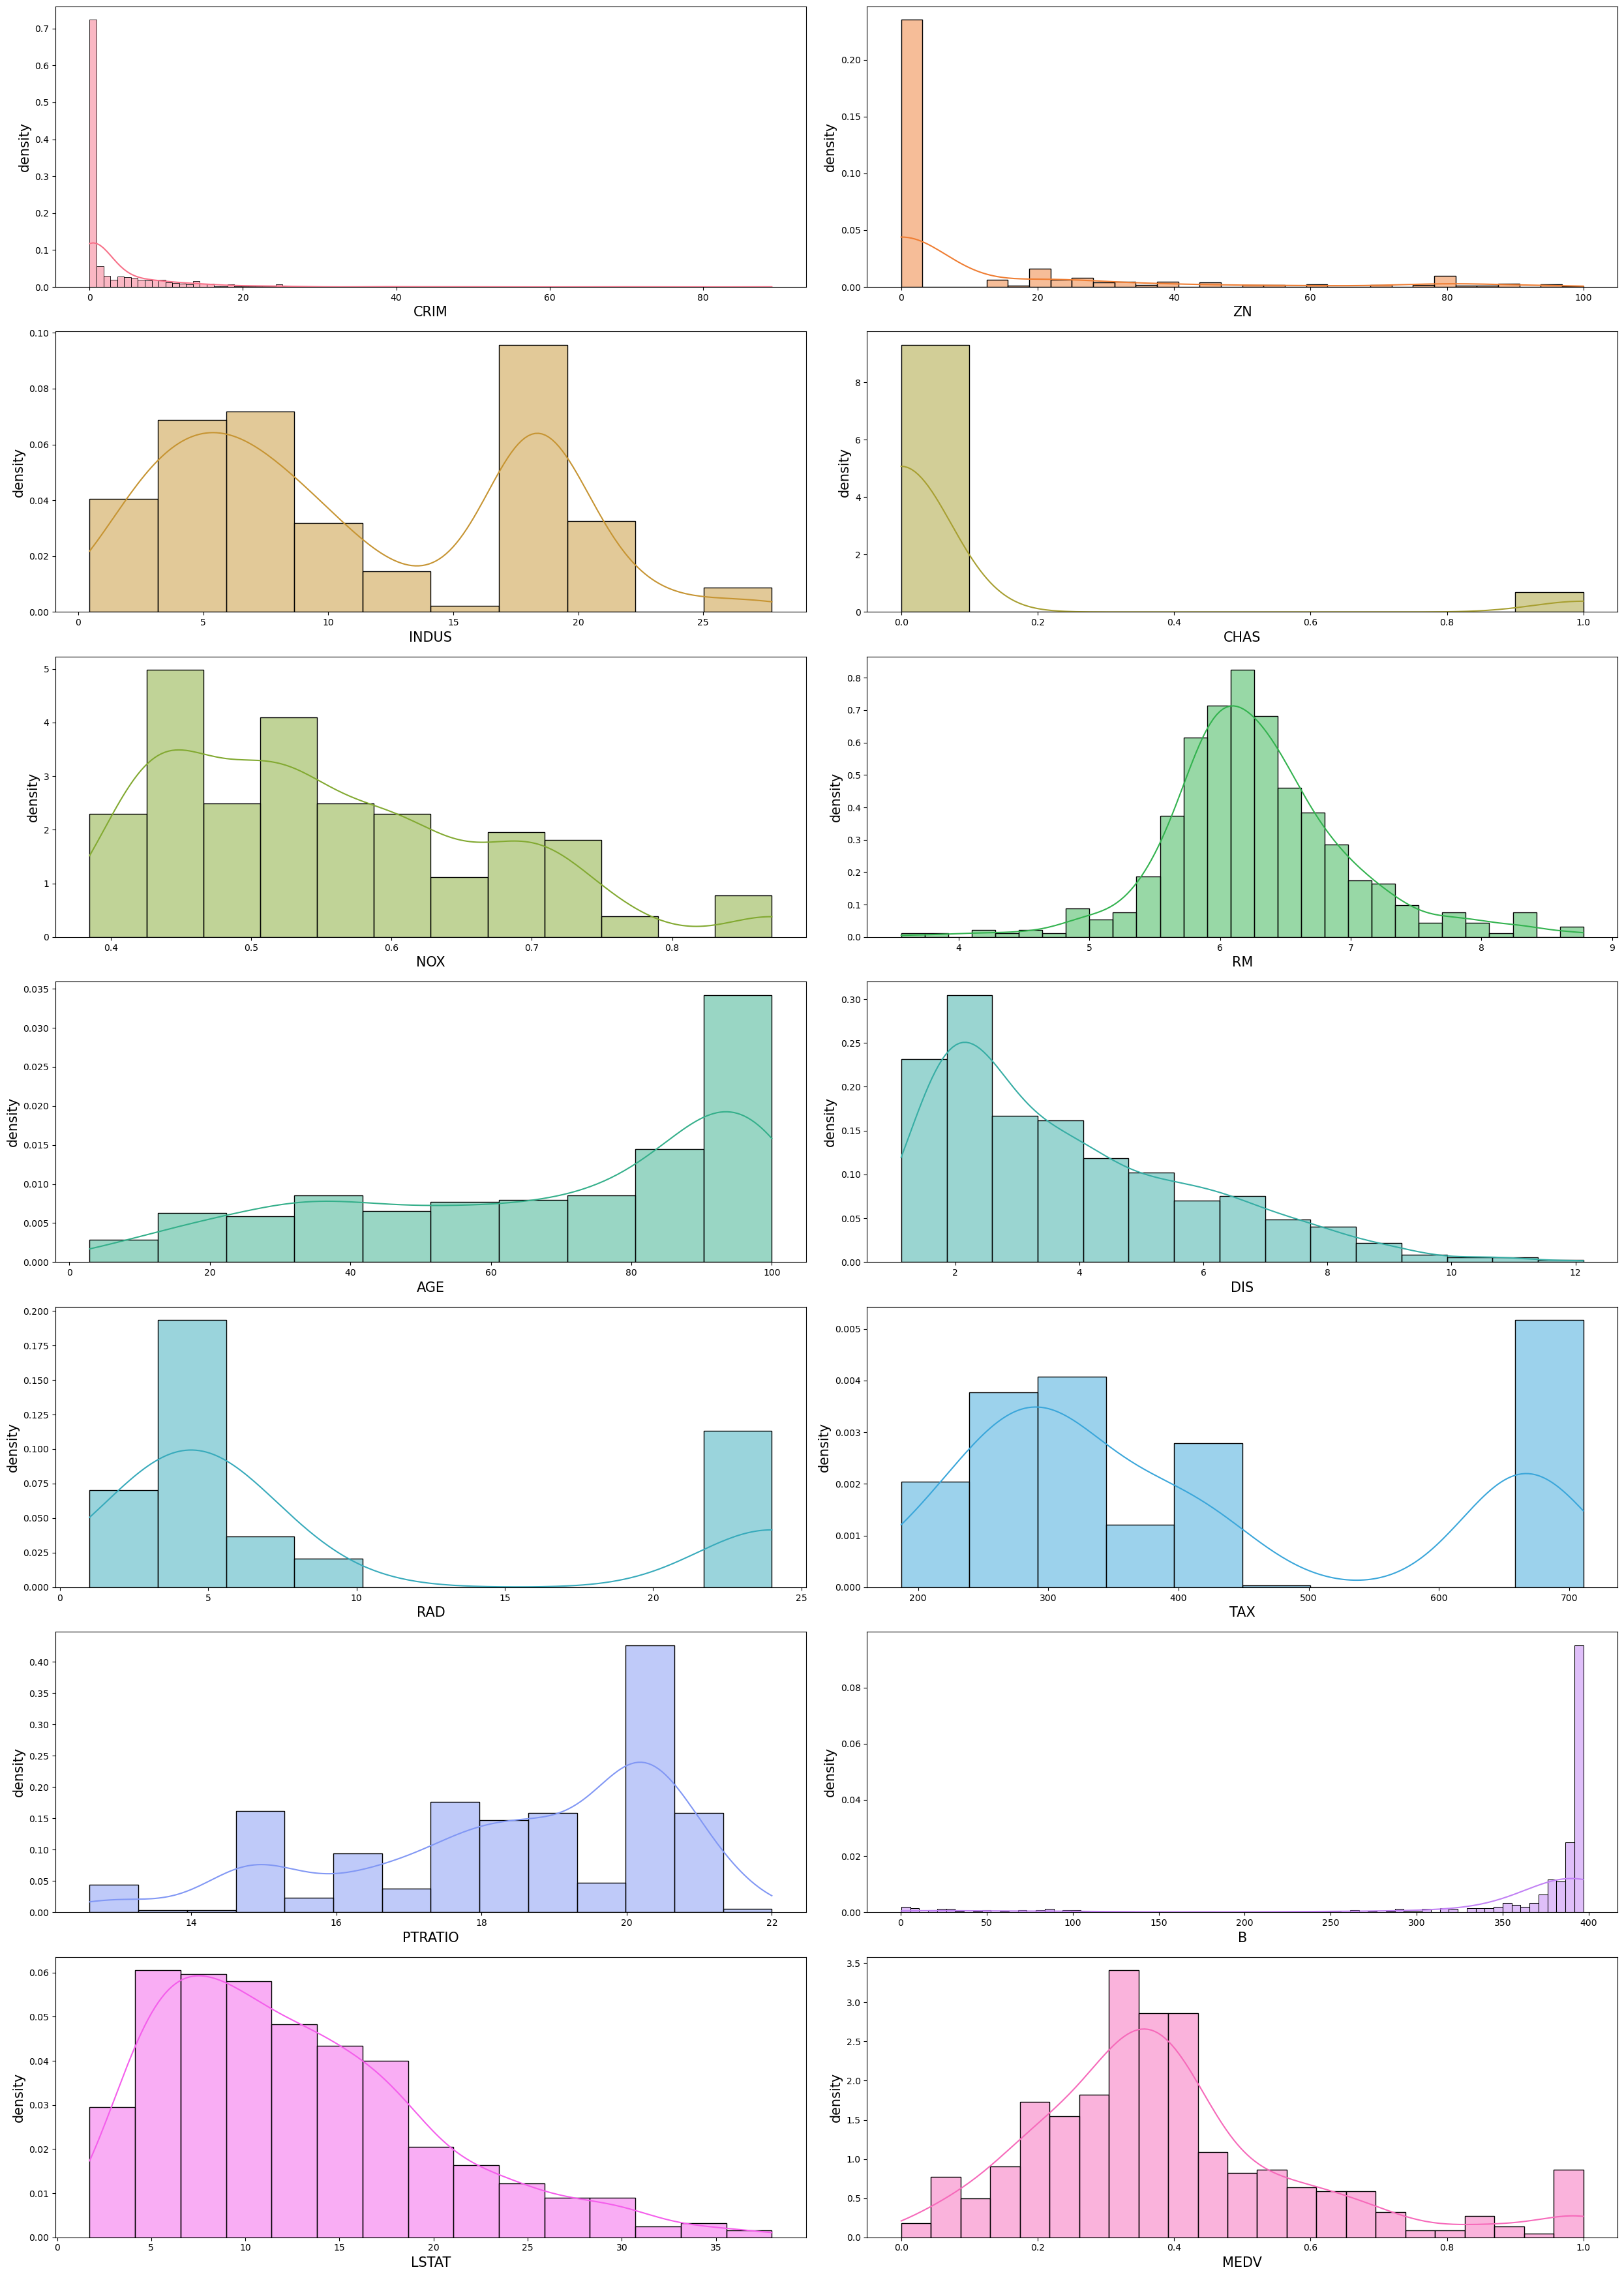

In [70]:
columns = list(data.columns)
fig,axes = plt.subplots(7,2,figsize=(25,35))
axes = axes.ravel()
palette = sns.color_palette("husl", len(columns))
for col, ax,color in zip(columns,axes,palette):
    plot = sns.histplot(data[col],kde= True,stat='density',ax=ax,color=color)
    plot.set_xlabel(col, fontsize = 15)
    plot.set_ylabel('density',fontsize=15)
plt.tight_layout()
plt.show()

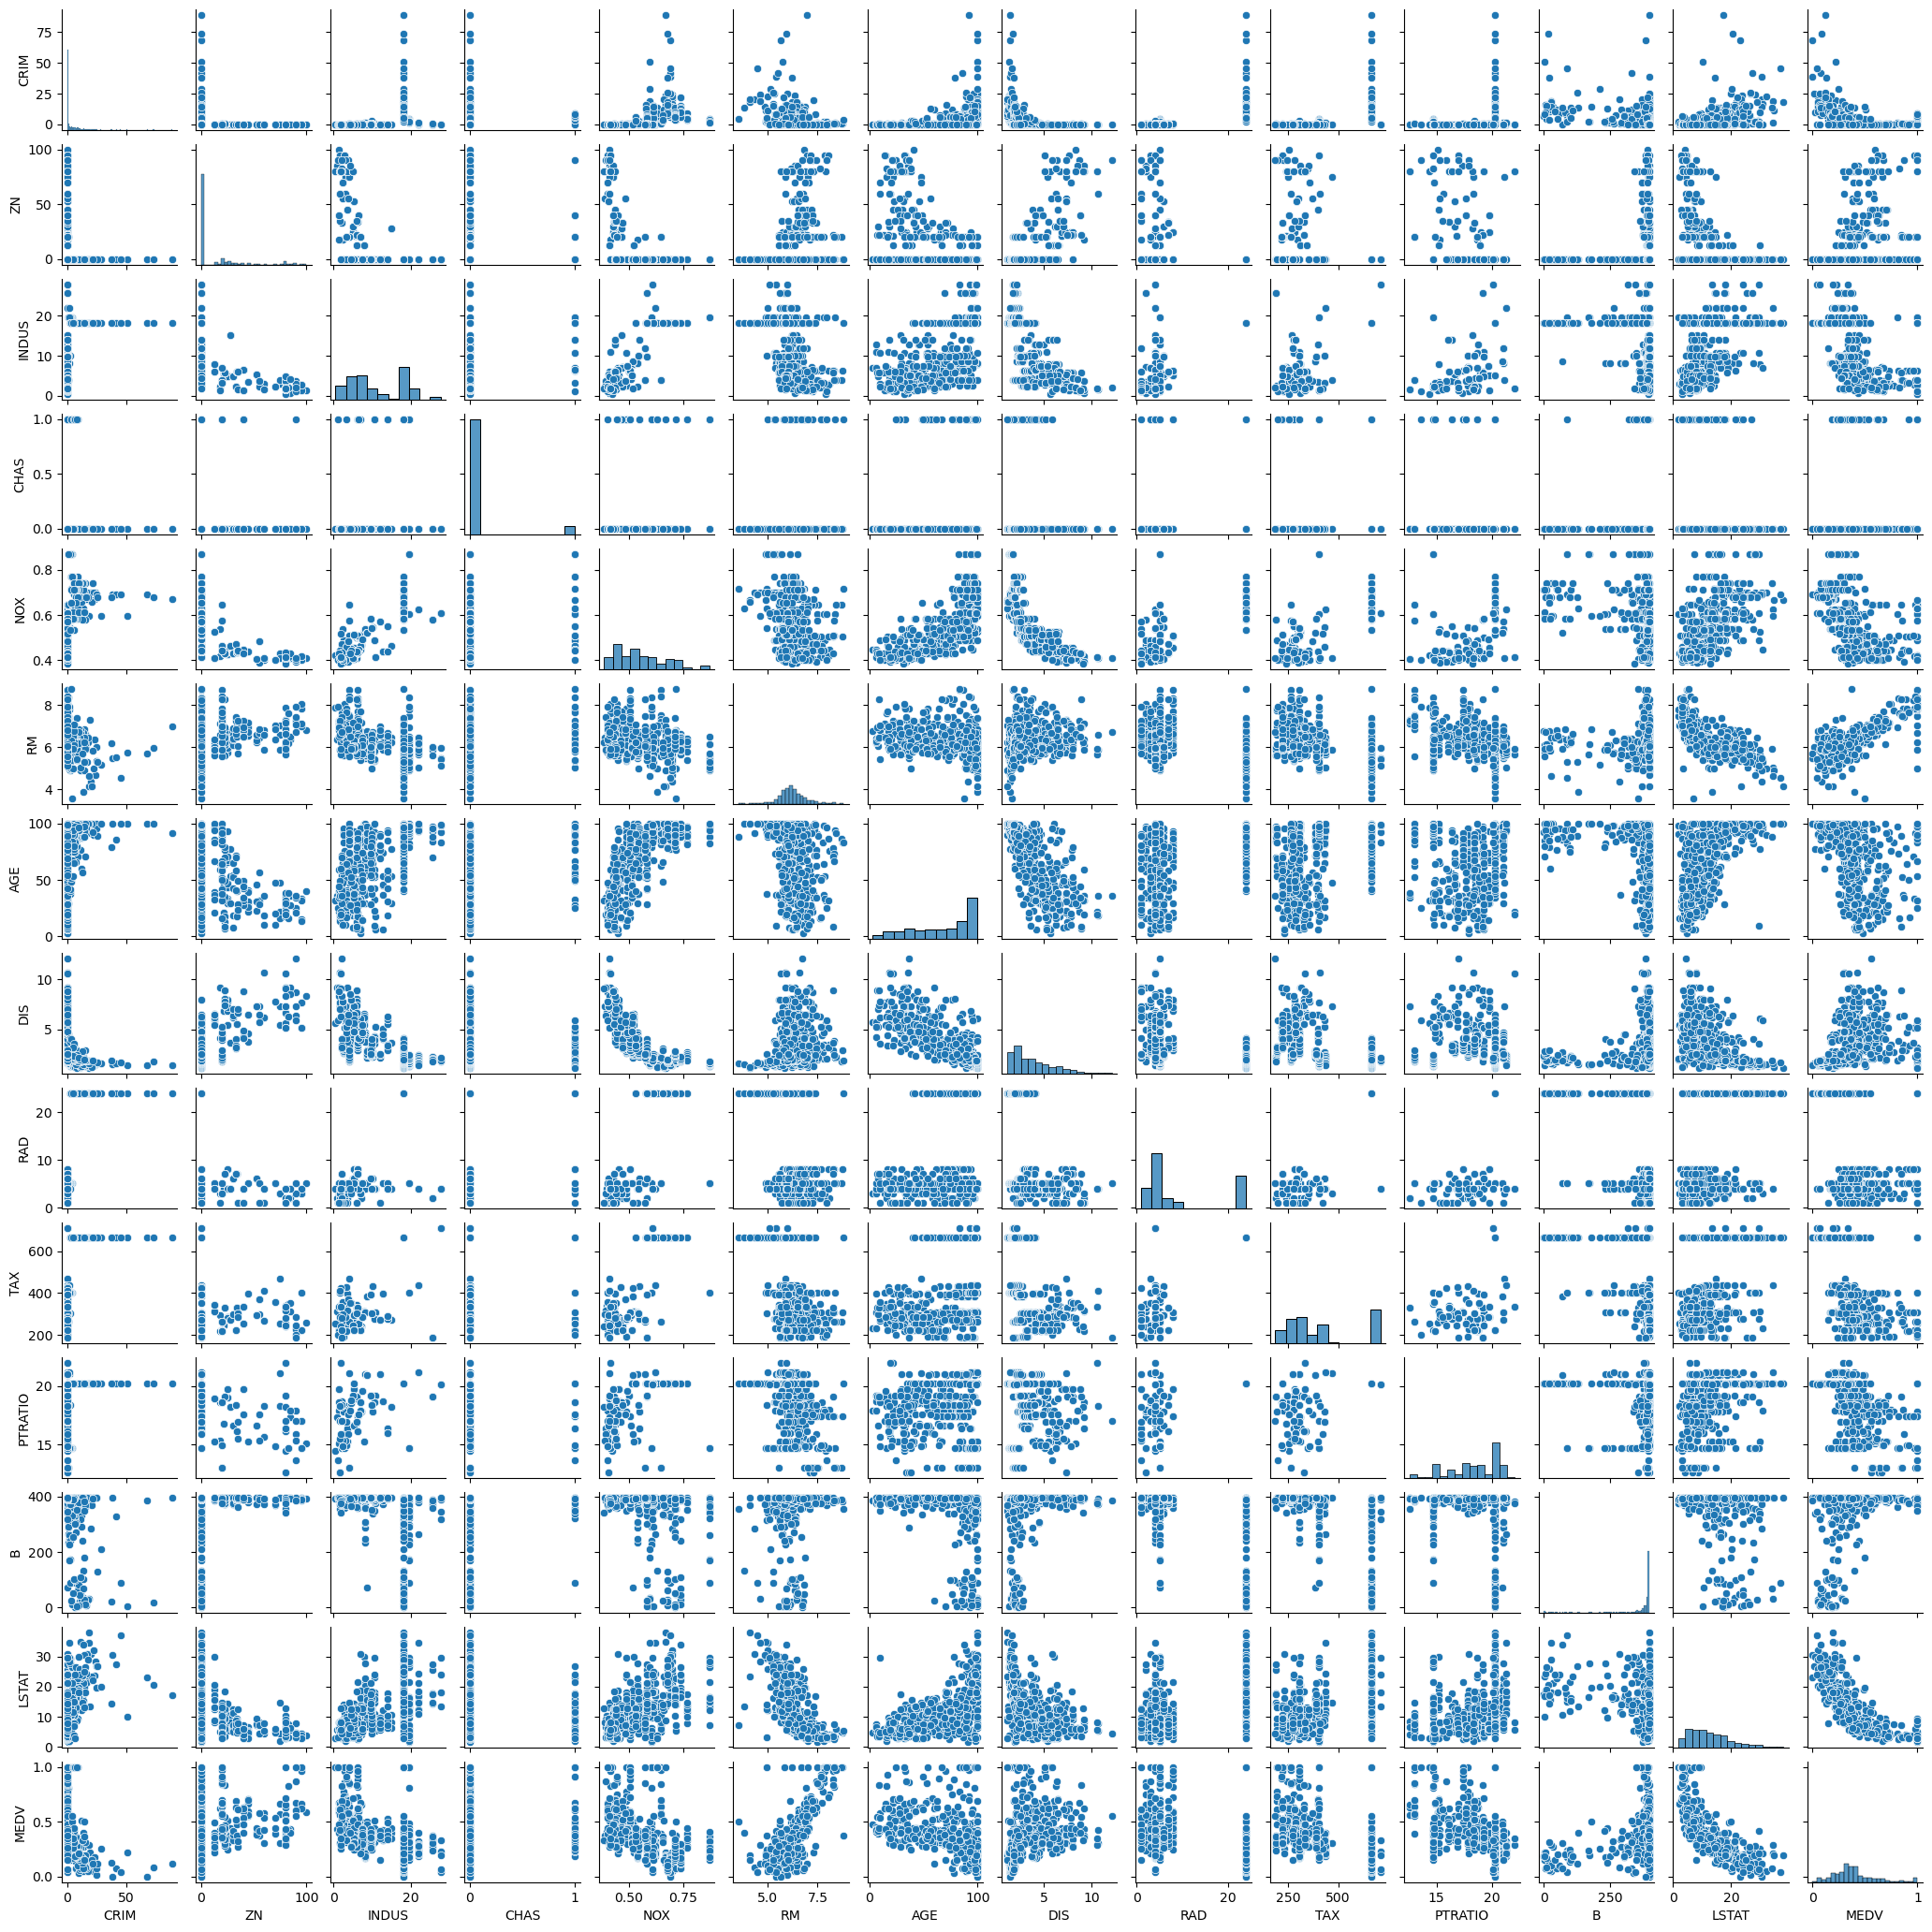

In [59]:
sns.pairplot(data,size=1.5)

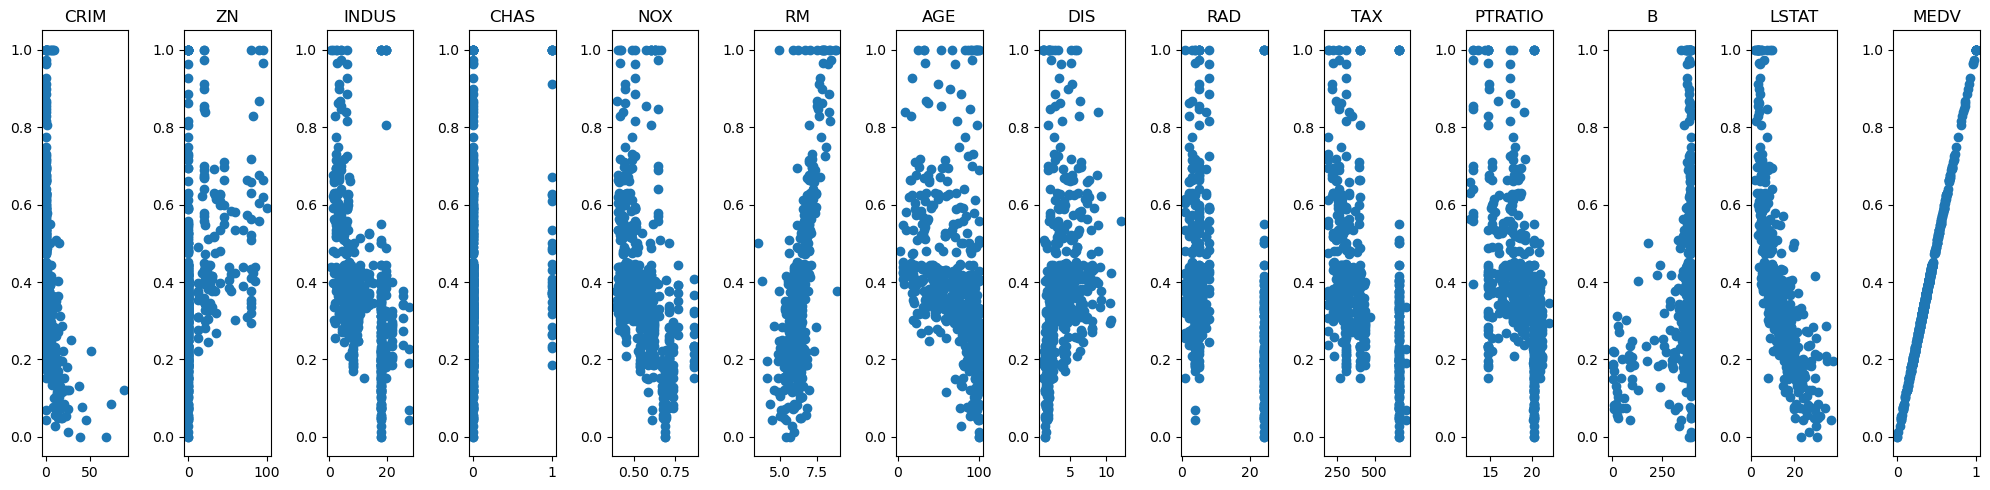

In [58]:
num_columns = len(data.columns)
plt.figure(figsize=(20, 5))
for i, col in enumerate(data.columns):
    plt.subplot(1, num_columns, i + 1)
    x = data[col]
    y = data['MEDV']
    plt.scatter(x, y)
    plt.title(col)
plt.tight_layout()
plt.show()

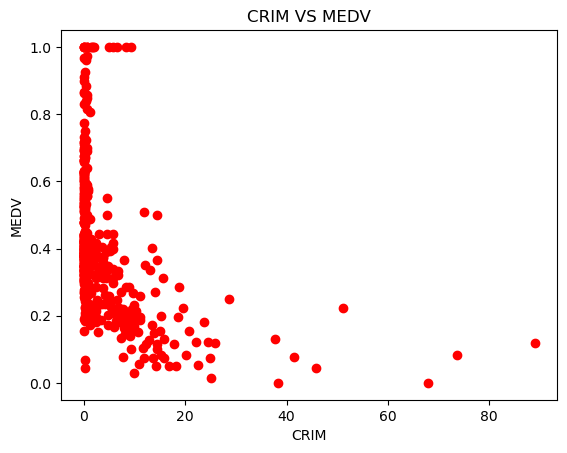

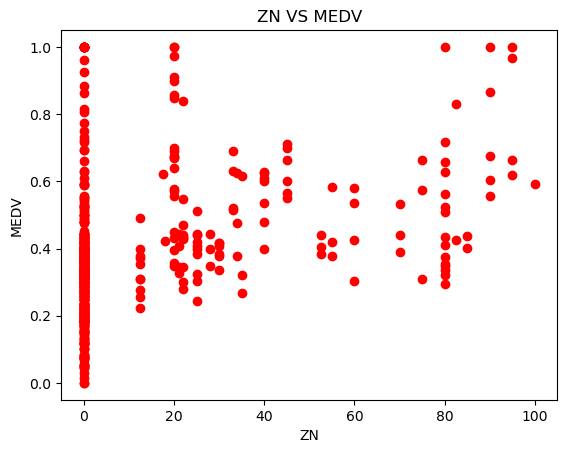

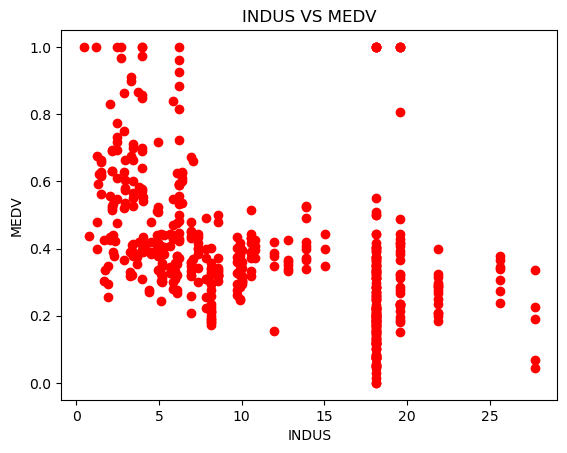

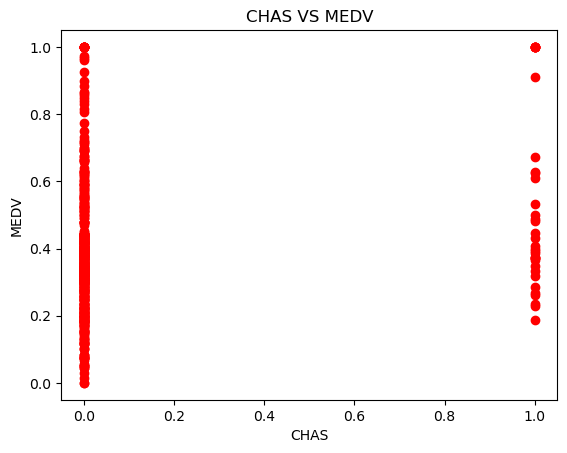

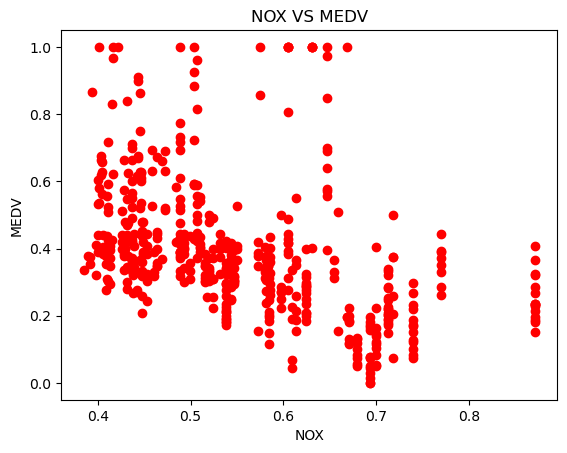

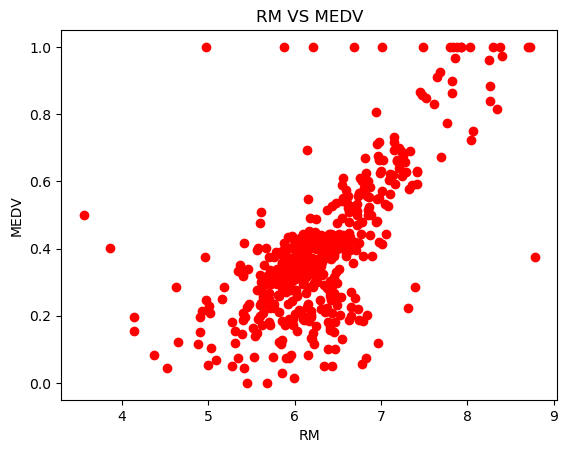

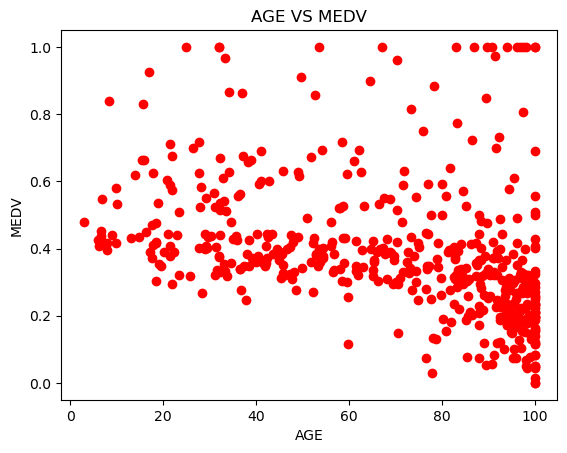

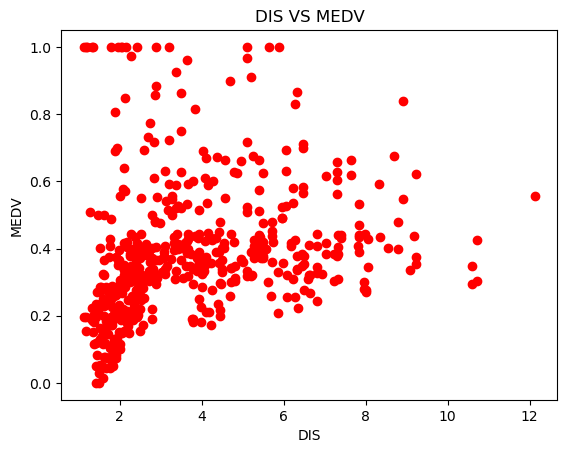

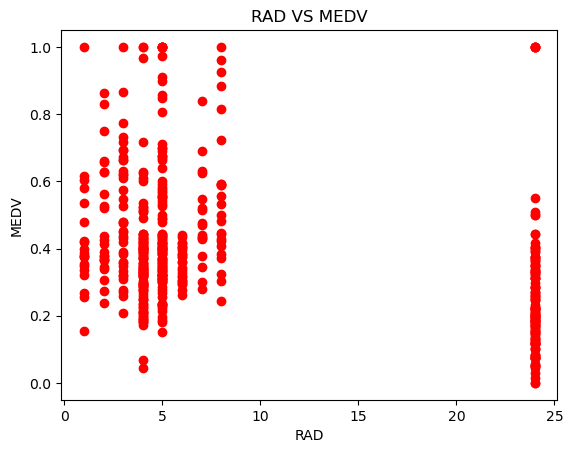

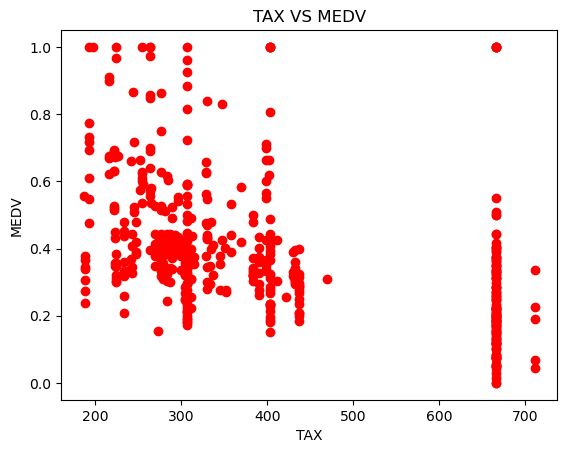

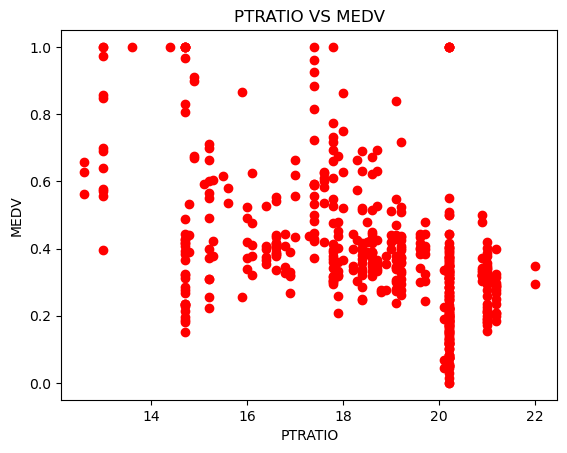

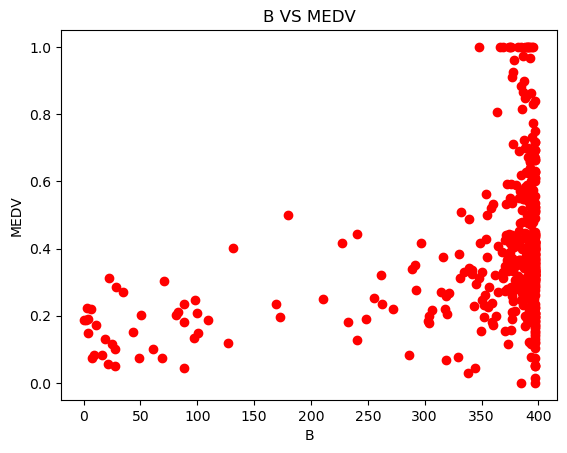

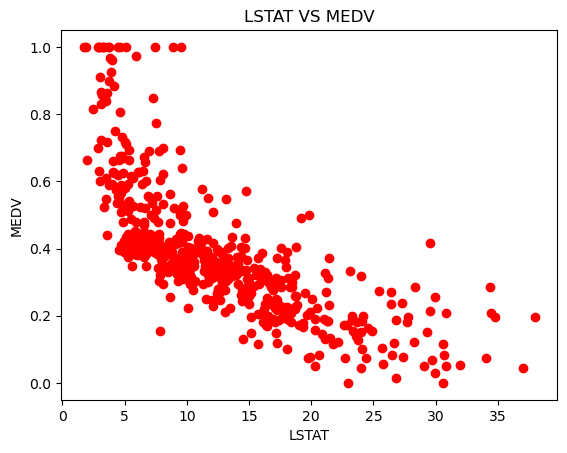

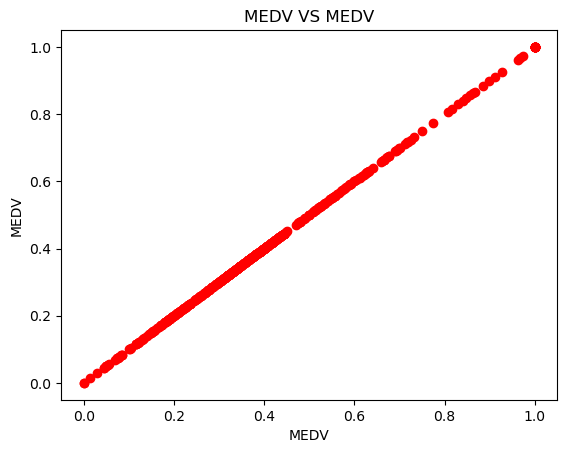

In [73]:
for col in data.columns:
    plt.scatter(data[col],data['MEDV'],c='r')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(col+str(' VS MEDV'))
    plt.show()

## Data Preprocessing 

In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features.remove('MEDV')

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [39]:
x = data.drop('MEDV', axis=1)
y = data['MEDV']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

## Building the Neural Network

In [46]:
#creating the logical structure 
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(units=7,activation="sigmoid",use_bias=True))
model.add(Dense(units=10,activation="sigmoid",use_bias=True))
model.add(Dense(units=8,activation="sigmoid",use_bias=True))
model.add(Dense(units=1,activation="linear",use_bias=True))

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 7)                   │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275 (1.07 KB)

 Trainable params: 275 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [48]:
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

## Training the Model

In [57]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=700, batch_size=100)

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 3.2869 - val_accuracy: 0.0000e+00 - val_loss: 10.1221
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 3.7502 - val_accuracy: 0.0000e+00 - val_loss: 10.8246
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 3.5605 - val_accuracy: 0.0000e+00 - val_loss: 9.4834
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 3.3156 - val_accuracy: 0.0000e+00 - val_loss: 11.6163
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 3.7387 - val_accuracy: 0.0000e+00 - val_loss: 10.1101
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 3.4254 - val_accuracy: 0.0000e+00 - val_loss: 10.9526
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 3.5848 - val_accuracy: 0.0000e+00 - val_loss: 10.0110
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accu

## Plot Training History
Visualize the training and validation loss over epochs.

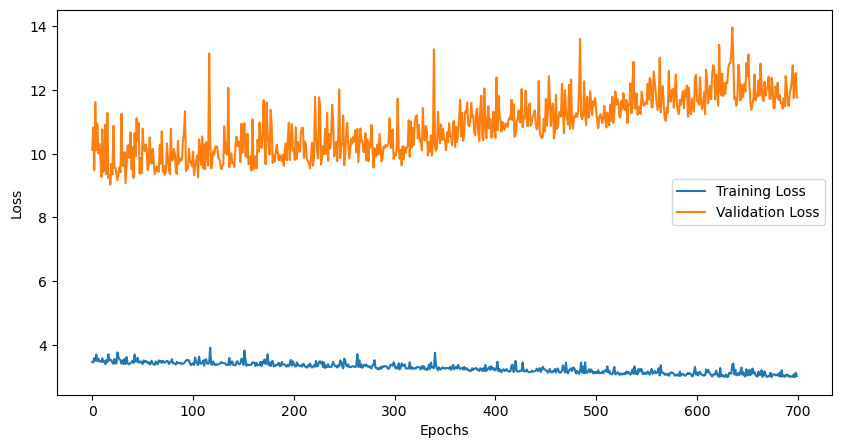

In [61]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Predictions and Evaluation

In [65]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error: 10.539745927977362
R² Score: 0.856277073488282
